
---

<h1><b>Ejercicio 5 — Rasterización desde Cero (Línea, Círculo, Triángulo)</b></h1>

**Meta:** Implementar algoritmos clásicos de rasterización sin el uso de librerías de alto nivel.

**Entorno:** Python (Pillow, NumPy, Matplotlib)

**Tareas:**

* Implementar el algoritmo de **Bresenham** para la rasterización de una línea.
* Implementar el método del **punto medio** para dibujar un círculo.
* Implementar el algoritmo **Scanline** para el relleno de un triángulo.

**Evidencia:**
Imágenes generadas a partir de los tres algoritmos y una reflexión final comparando su **precisión** y **eficiencia**.

---




## 🟥 **Línea — Algoritmo de Bresenham**

**Descripción breve:**
El algoritmo de Bresenham dibuja líneas en una cuadrícula de píxeles usando solo **operaciones enteras** (sumas y restas).
Evita los números decimales y cálculos trigonométricos, lo que lo hace **muy rápido y eficiente**.


---

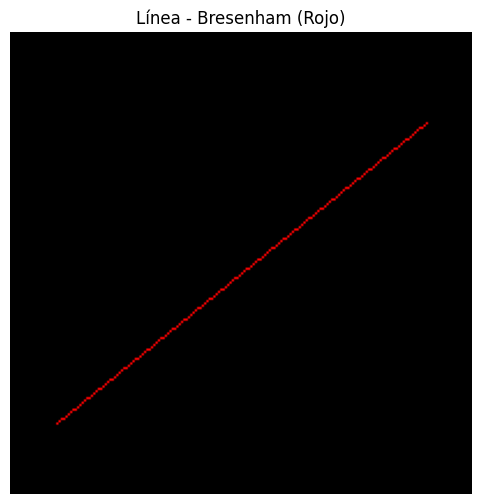

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mostrar(img, titulo="Imagen"):
    plt.figure(figsize=(6,6))
    plt.imshow(img, origin='lower')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

def bresenham_line(x0, y0, x1, y1, img, color):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        if 0 <= x0 < img.shape[1] and 0 <= y0 < img.shape[0]:
            img[y0, x0] = color
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy
# 1️⃣ Línea - Bresenham
img = np.zeros((200, 200, 3), dtype=np.uint8)
bresenham_line(20, 30, 180, 160, img, color=[255, 0, 0])  # Rojo
mostrar(img, "Línea - Bresenham (Rojo)")

## 🟢 **Círculo — Algoritmo del Punto Medio**

**Descripción breve:**
El método del punto medio genera un círculo trazando **puntos simétricos** en sus ocho octantes.
Usa un **parámetro de decisión ( p )** para determinar si el siguiente punto está dentro o fuera del círculo ideal, evitando funciones trigonométricas.

---

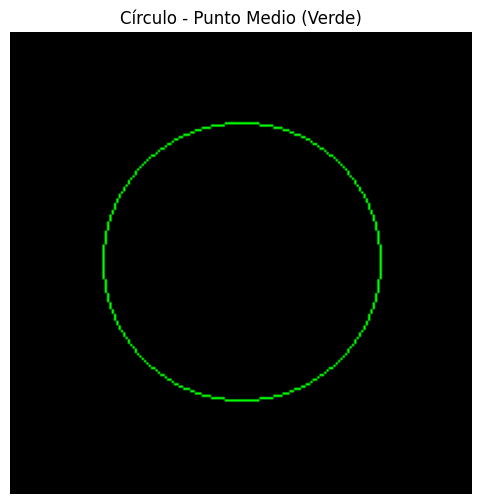

In [ ]:
def midpoint_circle(cx, cy, r, img, color):
    x = r
    y = 0
    p = 1 - r

    while x >= y:
        puntos = [
            (cx + x, cy + y), (cx - x, cy + y),
            (cx + x, cy - y), (cx - x, cy - y),
            (cx + y, cy + x), (cx - y, cy + x),
            (cx + y, cy - x), (cx - y, cy - x)
        ]
        for px, py in puntos:
            if 0 <= px < img.shape[1] and 0 <= py < img.shape[0]:
                img[py, px] = color
        y += 1
        if p <= 0:
            p += 2*y + 1
        else:
            x -= 1
            p += 2*(y - x) + 1
# 2️⃣ Círculo - Punto Medio
img = np.zeros((200, 200, 3), dtype=np.uint8)
midpoint_circle(100, 100, 60, img, color=[0, 255, 0])  # Verde
mostrar(img, "Círculo - Punto Medio (Verde)")

## 🟠 **Triángulo — Relleno por Scanline**

**Descripción breve:**
El algoritmo **Scanline** rellena un triángulo verificando, para cada fila de píxeles, qué puntos están dentro del área delimitada por los vértices.
Usa una función de borde (**edge function**) que evalúa si un punto está dentro o fuera del triángulo.
Si el signo de las tres funciones de borde es el mismo → el punto pertenece al triángulo.

---

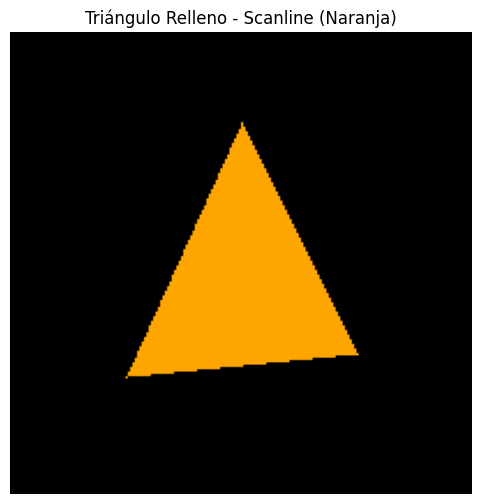

In [ ]:
def edge_function(v0, v1, p):
    return (p[0] - v0[0])*(v1[1] - v0[1]) - (p[1] - v0[1])*(v1[0] - v0[0])

def rasterize_triangle(v0, v1, v2, img, color):
    min_x = max(min(v0[0], v1[0], v2[0]), 0)
    max_x = min(max(v0[0], v1[0], v2[0]), img.shape[1]-1)
    min_y = max(min(v0[1], v1[1], v2[1]), 0)
    max_y = min(max(v0[1], v1[1], v2[1]), img.shape[0]-1)

    area = edge_function(v0, v1, v2)

    # Si el área es negativa, invertimos el signo de las pruebas
    for y in range(min_y, max_y+1):
        for x in range(min_x, max_x+1):
            p = (x, y)
            w0 = edge_function(v1, v2, p)
            w1 = edge_function(v2, v0, p)
            w2 = edge_function(v0, v1, p)

            if area > 0:
                inside = (w0 >= 0) and (w1 >= 0) and (w2 >= 0)
            else:
                inside = (w0 <= 0) and (w1 <= 0) and (w2 <= 0)

            if inside:
                img[y, x] = color

# 3️⃣ Triángulo - Scanline
img = np.zeros((200, 200, 3), dtype=np.uint8)
v0, v1, v2 = (50, 50), (150, 60), (100, 160)
rasterize_triangle(v0, v1, v2, img, color=[255, 165, 0])  # Naranja
mostrar(img, "Triángulo Relleno - Scanline (Naranja)")








## 📘 **Reflexión Final**

En este ejercicio se implementaron desde cero tres algoritmos clásicos de rasterización: Bresenham para líneas, el método del punto medio para círculos y el algoritmo Scanline para el relleno de triángulos.
La experiencia permitió comprender cómo los gráficos se construyen a nivel de píxel y cómo las decisiones matemáticas afectan la precisión y la eficiencia del dibujo.

El algoritmo de Bresenham demostró ser muy eficiente al evitar cálculos con números reales, utilizando solo operaciones enteras para determinar qué píxeles encender.
El método del punto medio para el círculo mostró una aproximación simétrica y precisa, aprovechando las propiedades geométricas para reducir el número de operaciones necesarias.
Finalmente, el algoritmo Scanline permitió entender el proceso de relleno de polígonos mediante el análisis de intersecciones horizontales y el barrido por filas.

Comparando los tres métodos, se observa que todos logran un equilibrio entre precisión y velocidad,
pero Bresenham y el método del punto medio destacan por su eficiencia computacional, mientras que Scanline es más complejo pero esencial para representar figuras sólidas.


---
